In [1]:
""" Importing Libraries """ 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
""" Using the read_csv() method to read
    the data which is stored in a .csv """

dataset = pd.read_csv('iris.csv')

if isinstance(dataset, pd.DataFrame):
    print ("Loaded the data from the .csv file!\n")
else:
    print ("Oops! There was an error")
    

dataset.head(n = 5) #Displays the first 'n' rows; 'n' defaults to 5

Loaded the data from the .csv file!



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
TOTAL = len(dataset)

types = list(set(dataset["Species"]))

In [4]:
""" Cleaning the data and storing 

    each parameter/property in a separate array"""


s_length = "SepalLengthCm"
s_width = "SepalWidthCm"

p_length = "PetalLengthCm"
p_width = "PetalWidthCm"

species = "Species"

sepal_lengths = [dataset[s_length][i] for i in range(TOTAL)]
sepal_widths = [dataset[s_width][i] for i in range(TOTAL)]

petal_lengths = [dataset[p_length][i] for i in range(TOTAL)]
petal_widths = [dataset[p_width][i] for i in range(TOTAL)]

In [5]:
colors = [types.index(dataset[species][i]) for i in range(TOTAL)]
indices = colors[:]

for i in range(TOTAL):
    if (colors[i] == 0):
        colors[i] = 'red'
    elif (colors[i] == 1):
        colors[i] = 'blue'
    else:
        colors[i] = 'green'

In [6]:
""" Creating the dots/circles to be used

    in the legend """

red_dot = mpatches.Circle((0.5, 0.5), 0.25,
                    color="red", linewidth=1)

blue_dot = mpatches.Circle((0.5, 0.5), 0.25,
                    color="blue", linewidth=1)

green_dot = mpatches.Circle((0.5, 0.5), 0.25,
                    color="green", linewidth=1)

yellow_dot = mpatches.Circle((0.5, 0.5), 0.25,
                    color="yellow", linewidth=1)

dots = [red_dot, blue_dot, green_dot]

In [7]:
""" Function below is used to plot a graph between 
    2 parameters to analyse the data
    
    For example, below is a graph of:
    
    Sepal Length v/s Sepal Width"""

def compare(x_axis, y_axis, x_label, y_label):
    for i in range(TOTAL):
        plt.scatter(x_axis[i], y_axis[i], color = colors[i])


    plt.legend(dots, types, prop = {'size': 20})
    plt.xlabel('%s (cm)' %(x_label), size = 20)
    plt.ylabel('%s (cm)' %(y_label), size = 20)
    plt.show()

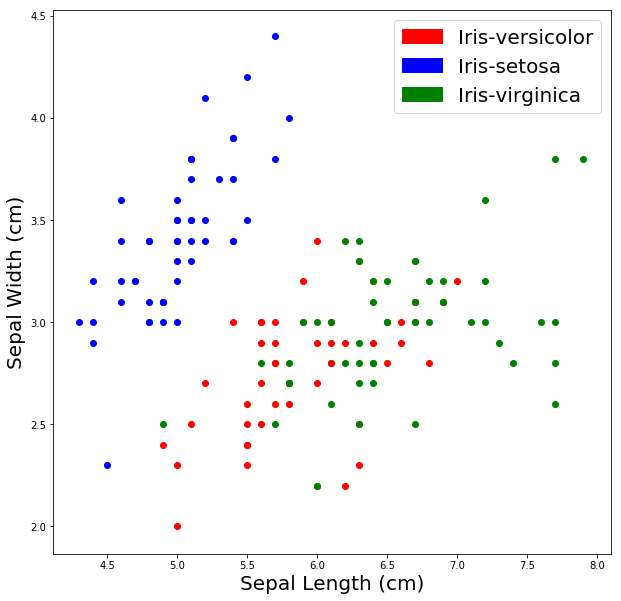

In [8]:
""" Sepal Length v/s Sepal Width """

fig = plt.figure(figsize = (10, 10))
compare(sepal_lengths, sepal_widths, "Sepal Length", "Sepal Width")

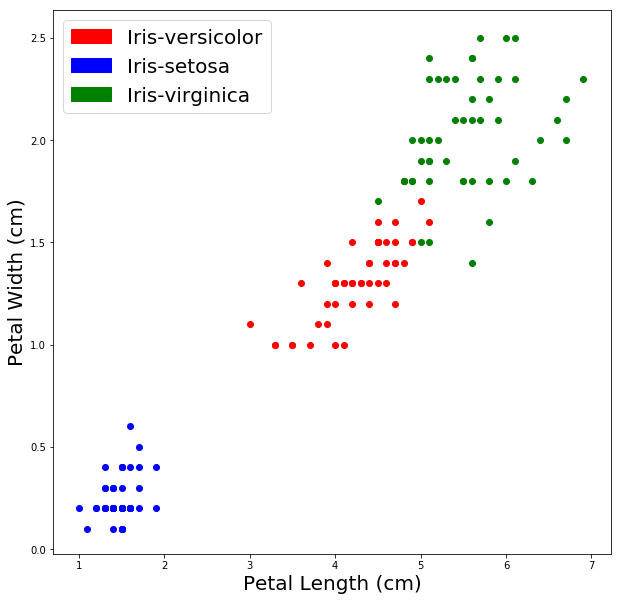

In [9]:
""" Petal Length v/s Petal Width """

fig = plt.figure(figsize = (10, 10));
compare(petal_lengths, petal_widths, "Petal Length", "Petal Width")

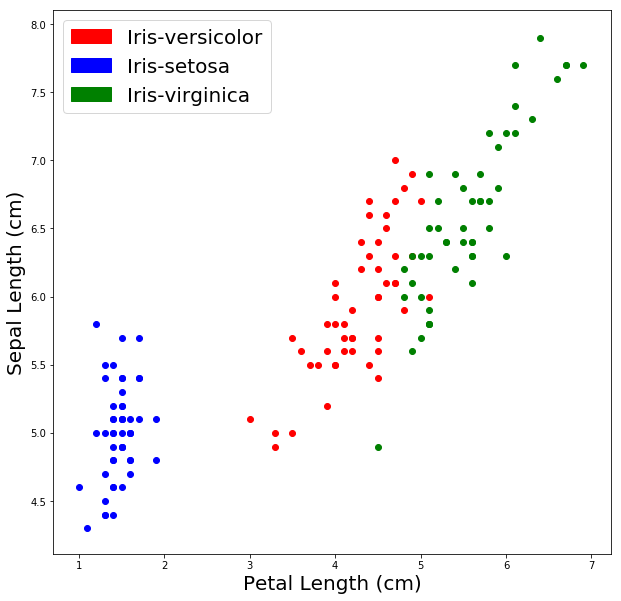

In [10]:
""" Petal Length v/s Sepal Length """

fig = plt.figure(figsize = (10, 10));
compare(petal_lengths, sepal_lengths, "Petal Length", "Sepal Length")

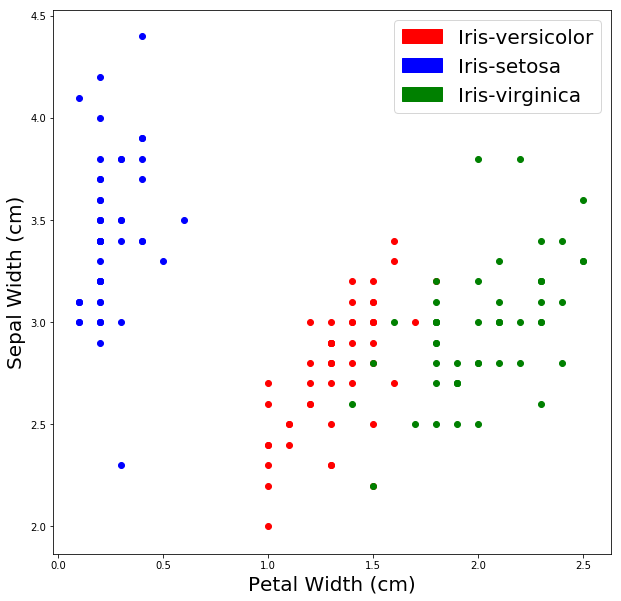

In [11]:
""" Petal Width v/s Sepal Width """

fig = plt.figure(figsize = (10, 10));
compare(petal_widths, sepal_widths, "Petal Width", "Sepal Width")

    Now, to create the training and testing datasets:
    
    1) The first array is a 2D array(X) and will hold the parameters
        for each of the samples 
    
    2) The second array is a 1D array(Y) and will hold the
        specie type of each sample
        
    3) Note that the column with label 'Id' will have to be 
        ignored because it's not a parameter

In [12]:
""" Drop the columns with labels

    'Id' and 'Species'
    
    We drop 'Species' because it has
    
    to be stored in Y """

# X = dataset.drop(['Id', 'Species'], axis = 1)
# X = np.array(X)
# X = list(X)*epochs

X = list(np.array(dataset.drop(['Id', 'Species'], axis = 1)))

In [13]:
""" Using a label encoder we can
    
    change the specie name to an integer value """


lab_enc = preprocessing.LabelEncoder()

# Y = list(np.array(dataset['Species']))

# Y = lab_enc.fit_transform(Y)

# print (Y)
Y = indices

In [14]:
""" Using the train_test_split() method we split our dataset
    into 2 sets
    
    - The first one will be used for training our model
    
    - The second one will be used for testing the 
        model's accuracy."""


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.33)

In [15]:
""" Time for the fun part, training the model """

linreg = LinearRegression(normalize = True)

linreg.fit(X_train, Y_train)

accuracy = linreg.score(X_test, Y_test)

print ('The Accuracy of the model is {acc:.4f}'.format(acc = accuracy * 100))


The Accuracy of the model is 11.3340


In [16]:
""" Trying the other linear models """

total_models = 3
max_epochs = 20

#Model 1
sgd = SGDClassifier(random_state = 42, loss = 'hinge', penalty = 'l2', max_iter = TOTAL * max_epochs)

#Model 2
logreg = LogisticRegression(random_state = 42, max_iter = TOTAL * max_epochs)

#Model 3
perceptron = Perceptron(random_state = 42, max_iter = TOTAL * max_epochs)

models = [sgd            ,  logreg              ,  perceptron]

names  = ['SGDClassifier', 'LogisticRegression', 'Perceptron']


In [17]:
def trainModel(model):
    model.fit(X_train, Y_train)

def printAccuracy(model, model_name):
    accuracy = model.score(X_test, Y_test)
    print ("\nAccuracy of the '{model_name}' model = {acc:.4f}\n".format(model_name = model_name,
                                                                                    acc = accuracy * 100))

In [18]:
for i,j in zip(models, range(total_models)):
    trainModel(i)
    printAccuracy(i, names[j])


Accuracy of the 'SGDClassifier' model = 96.0000


Accuracy of the 'LogisticRegression' model = 88.0000


Accuracy of the 'Perceptron' model = 62.0000



In [19]:
""" Checks accuracy of the given model
    on the given dataset"""


def checkAccuracy(model, model_name, dataset = X):
    c = 0
    predictions = list(model.predict(X))

    for i in range(TOTAL):
        if (predictions[i] == Y[i]):
            c += 1
            
    accuracy = float(c) / (TOTAL)
    print ("\nAccuracy of the '{model_name}' model == {acc:.4f}\n".format(model_name = model_name,
                                                                         acc = accuracy * 100))

In [20]:
for i,j in zip(models, range(total_models)):
    checkAccuracy(i, names[j], dataset = X)


Accuracy of the 'SGDClassifier' model == 96.6667


Accuracy of the 'LogisticRegression' model == 93.3333


Accuracy of the 'Perceptron' model == 68.0000

